<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [10]:
import numpy as np

def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros_like(V[0])
    for i in range(len(V)):
        result += np.dot(X[i], V[i])

    return result

def tests():
        X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
        V = [np.array([[1], [1]]), np.array([[1], [1]])]
        result = sum_prod(X, V)
        expected = np.array([[14], [22]])  
        assert np.array_equal(result, expected)
        print("Тесты пройдены.")

tests()


Тесты пройдены.


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [9]:
import numpy as np

def binarize(M, threshold=0.5):
    binary_matrix = np.where(M > threshold, 1, 0)
    return binary_matrix

def test():
    threshold = 0.5
    M = np.array([[0.2, 0.7, 0.8], [0.4, 0.9, 0.1]])

    expected_result = np.array([[0, 1, 1], [0, 1, 0]])
    assert np.allclose(binarize(M, threshold), expected_result)

    M2 = np.array([[1.2, 0.3], [0.6, 0.8]])

    expected_result = np.array([[1, 0], [1, 1]])
    assert np.allclose(binarize(M2, threshold), expected_result)

    print("Тесты пройдены.")

test()

Тесты пройдены.


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [11]:
import numpy as np

def unique_rows(mat):
    return np.array([np.unique(row) for row in mat])

def unique_columns(mat):
    return [np.unique(column) for column in mat.T]

def tests_rows():
    M = np.array([[1, 2, 2], [3, 4, 4], [5, 6, 5]])
    expected = np.array([[1, 2], [3, 4], [5, 6]]) 
    assert np.array_equal(unique_rows(M), expected)
    M = np.array([[2, 2, 2], [2, 2, 2], [2, 2, 2]])
    expected = np.array([[2], [2], [2]])
    assert np.array_equal(unique_rows(M), expected)
    print('Тесты строк пройдены.')

def tests_columns():
    M = np.array([[1, 2, 2], [3, 4, 4], [5, 6, 5]])
    expected = np.array([[1, 3, 5],[2, 4, 6],[2, 4, 5]])
    assert np.array_equal(unique_columns(M), expected)
    M = np.array([[2, 2, 2], [2, 2, 2], [2, 2, 2]])
    expected = np.array([[2], [2], [2]])
    assert np.array_equal(unique_columns(M), expected)
    print('Тесты столбцов пройдены.')

tests_rows()
tests_columns()

Тесты строк пройдены.
Тесты столбцов пройдены.


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Мат ожидание по столбцам: [ 0.28137082 -0.08465539 -0.70805754 -0.074066  ]
Дисперсия по столбцам: [0.17408553 0.39765395 1.65788275 0.43363072]
Мат ожидание по строкам: [-0.75816128 -0.2383065  -0.22024292  0.6313026 ]
Дисперсия по строкам: [0.3866681  0.9342021  0.42833084 0.42857081]


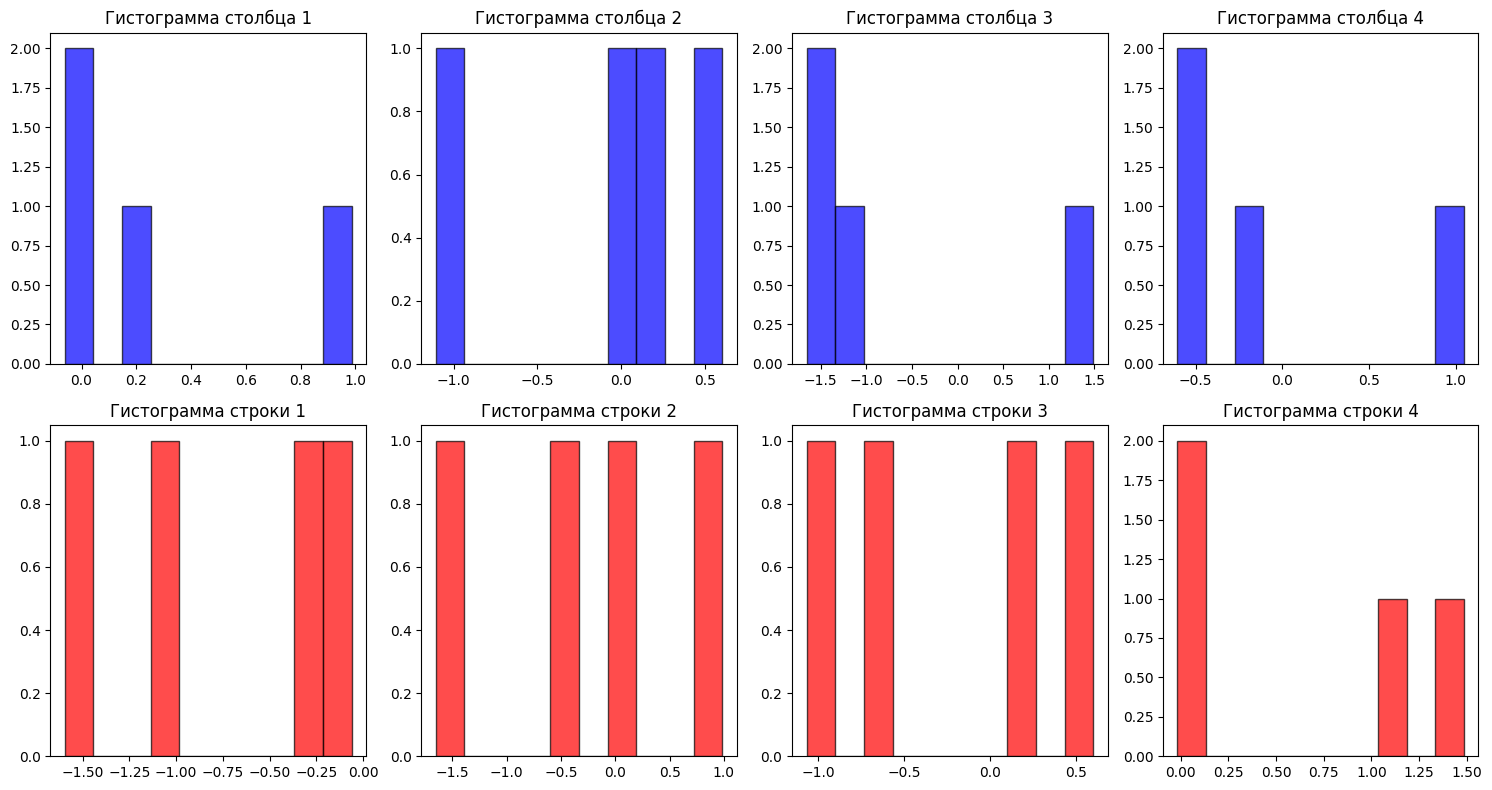

In [12]:
import matplotlib.pyplot as plt

def fill_matrix_and_analyze(m, n):
    M = np.random.normal(size=(m, n))
    
    means_columns = np.mean(M, axis=0)
    variances_columns = np.var(M, axis=0)
    means_rows = np.mean(M, axis=1)
    variances_rows = np.var(M, axis=1)

    print("Мат ожидание по столбцам:", means_columns)
    print("Дисперсия по столбцам:", variances_columns)
    print("Мат ожидание по строкам:", means_rows)
    print("Дисперсия по строкам:", variances_rows)

    # Построение гистограмм
    fig, axes = plt.subplots(2, n, figsize=(15, 8))
    
    # Гистограммы столбцов
    for i in range(n):
        axes[0, i].hist(M[:, i], bins=10, color='blue', edgecolor='black', alpha=0.7)
        axes[0, i].set_title(f'Гистограмма столбца {i+1}')
    
    # Гистограммы строк
    for i in range(m):
        axes[1, i].hist(M[i, :], bins=10, color='red', edgecolor='black', alpha=0.7)
        axes[1, i].set_title(f'Гистограмма строки {i+1}')
    
    plt.tight_layout()
    plt.show()

fill_matrix_and_analyze(4,4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [15]:
def chess(m, n, a, b):
    matrix = [[0 for _ in range(n)] for _ in range(m)]
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b
    return matrix

def test():
    assert chess(2, 2, 0, 1) == [[0, 1], [1, 0]]
    assert chess(4, 4, 6, 9) == [[6, 9, 6, 9], [9, 6, 9, 6], [6, 9, 6, 9], [9, 6, 9, 6]]
    assert chess(3, 3, 0, 1) == [[0, 1, 0], [1, 0, 1], [0, 1, 0]]
    print("Тесты пройдены.")

test()

Тесты пройдены.


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

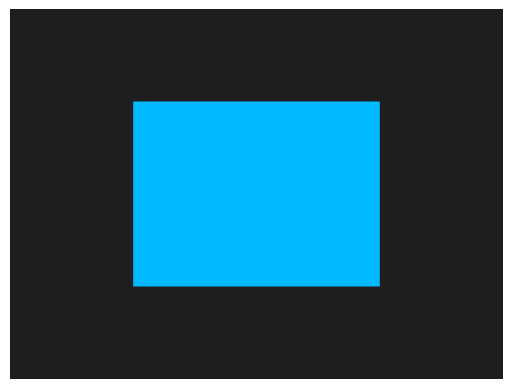

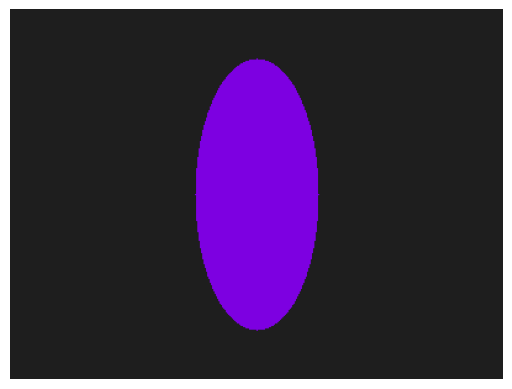

In [32]:
def draw_rectangle(a, b, m, n, rect_color, bg_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:] = bg_color

    x0, y0 = (n - a) // 2, (m - b) // 2 
    image[y0:y0+b, x0:x0+a] = rect_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, bg_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:] = bg_color
    
    y, x = np.ogrid[:m, :n]
    x0, y0 = n // 2, m // 2
    ellipse_mask = ((x - x0) ** 2) / a ** 2 + ((y - y0) ** 2) / b ** 2 <= 1
    image[ellipse_mask] = ellipse_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
draw_rectangle(200, 150, 300, 400, rect_color=(0, 185, 255), bg_color=(30, 30, 30))
draw_ellipse(50, 110, 300, 400, ellipse_color=(125, 0, 225), bg_color=(30, 30, 30))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [33]:
def calculate_statistics(series):
    # Мат ожидание
    mean = np.mean(series)
    # Дисперсия
    variance = np.var(series)
    # Среднеквадратическое отклонение
    std_dev = np.std(series)
    
    return mean, variance, std_dev

def find_local_extrema(data):
    local_max = []
    local_min = []
    for i in range(1, len(data) - 1):
        if data[i] < data[i - 1] and data[i] < data[i + 1]:
            local_min.append(int(data[i]))
        if data[i] > data[i - 1] and data[i] > data[i + 1]:
            local_max.append(int(data[i]))
            
    return local_max, local_min

def calculate_smooth(data, p):
    return np.convolve(data, np.ones(p), mode='valid') / p

data = np.array([1, 2, 5, 4, 6, 2, 3, 7, 6, 5])
p = 3

local_max, local_min = find_local_extrema(data)
smooth = calculate_smooth(data, p)

print("Мат ожидание:", np.mean(data))
print("Дисперсия:", np.var(data))
print("СКО:", np.std(data))
print("Локал максимум:", local_max)
print("Локал минимум:", local_min)
print("Среднее:", smooth)

Мат ожидание: 4.1
Дисперсия: 3.69
СКО: 1.9209372712298547
Локал максимум: [5, 6, 7]
Локал минимум: [4, 2]
Среднее: [2.66666667 3.66666667 5.         4.         3.66666667 4.
 5.33333333 6.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [34]:
def one_hot_encoding(mask):
    n = np.max(mask) + 1
    res = np.zeros((len(mask), n), dtype=int)
    for i, j in enumerate(mask):
        res[i, j] = 1
    return res


def tests():
    M = np.array([0, 2, 3, 0])
    res = one_hot_encoding(M)
    assert np.array_equal(res, np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]))
    print("Тесты пройдены.")

tests()

Тесты пройдены.
